## Curate metadata for TARA
##### last updated 12-17-2018

In [2]:
library(reshape2); library(ggplot2); library(dplyr)
options(repr.plot.width = 5, repr.plot.height = 4) #set plot size output

Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
# Import pangaea data
env<-read.table('datasets/TARA_SAMPLES_CONTEXT_ENV-WATERCOLUMN.tab', check.names = FALSE,skip = 2522, header = TRUE, sep ='\t')
head(env[1:2,])

"Sample ID (registered at PANGAEA, Data P...)",Sample ID (registered at the BioSamples ...),Sample ID (registered at the European Nu...),Basis,Campaign,Station,Device,Event,Date/Time,Latitude,⋯,u [cm/s],v [cm/s],OW,MLE [1/day],RT [days],Latitude (of the continental shelf with...),Longitude (of the continental shelf with...),Age [days],Latitude (of the geographic coordinate ...),Longitude (of the geographic coordinate ...)
TARA_X000000174,SAMEA4402502,ERS1313951,SV Tara,TARA_20090905Z,TARA_001,"Plankton net, type=Bongo, mesh(µm)=300, mouth(m^2)=0.258319, length(m)=3",TARA_20090907T1530Z_001_EVENT_NET,2009-09-07T15:30,44.4013,⋯,-3.855836,-8.864694,-0.11994,0.075851,10.97222,NA,NA,120,44.48297,-10.34875
TARA_X000000173,SAMEA4402503,ERS1313952,SV Tara,TARA_20090905Z,TARA_001,"Plankton net+sieve, type=Double, mesh(µm)=20, mouth(m^2)=0.192442, length(m)=2.5",TARA_20090907T1610Z_001_EVENT_NET,2009-09-07T16:10,44.4013,⋯,-3.855836,-8.864694,-0.11994,0.075851,10.97222,NA,NA,120,44.48297,-10.34875


In [4]:
# look at column names of PANGEA input table
colnames(env)[1]<-"sample_alias"
as.list(colnames(env)) # Look for duplicated names or errors

[[1]]
[1] "sample_alias"

[[2]]
[1] "Sample ID (registered at the BioSamples ...)"

[[3]]
[1] "Sample ID (registered at the European Nu...)"

[[4]]
[1] "Basis"

[[5]]
[1] "Campaign"

[[6]]
[1] "Station"

[[7]]
[1] "Device"

[[8]]
[1] "Event"

[[9]]
[1] "Date/Time"

[[10]]
[1] "Latitude"

[[11]]
[1] "Longitude"

[[12]]
[1] "Env feature"

[[13]]
[1] "Depth, nominal"

[[14]]
[1] "Depth top [m]"

[[15]]
[1] "Depth bot [m]"

[[16]]
[1] "Fraction lower [µm]"

[[17]]
[1] "Fraction upper [µm]"

[[18]]
[1] "Sample material"

[[19]]
[1] "Sample method"

[[20]]
[1] "Sample label"

[[21]]
[1] "MP biome"

[[22]]
[1] "OS region"

[[23]]
[1] "BG province"

[[24]]
[1] "Sea ice conc [%]"

[[25]]
[1] "Sea ice free period start DOY [day]"

[[26]]
[1] "Sea Ice free period [days]"

[[27]]
[1] "Sea ice free period end DOY [day]"

[[28]]
[1] "Season (at the sampling location and ...)"

[[29]]
[1] "Season (at the sampling location and ...)"

[[30]]
[1] "Moon phase nominal"

[[31]]
[1] "Moon phase proportion"

[[32]]
[1] "Time of day"

[[33]]
[1] "SSD [min]"

[[34]]
[1] "PAR day [mol quanta/m**2/day] (at the sampling location and ...)"

[[35]]
[1] "PAR day [mol quanta/m**2/day] (calculated from AMODIS produc...)"

[[36]]
[1] "PAR day [mol quanta/m**2/day] (Calculated from GlobColour pr...)"

[[37]]
[1] "PAR day [mol quanta/m**2/day] (at the sampling location for ...)"

[[38]]
[1] "SST grad h [°C/100 km] (calculated from AMODIS products)"

[[39]]
[1] "Fe tot [µmol/l]"

[[40]]
[1] "Fe std dev [±]"

[[41]]
[1] "[NH4]+ [µmol/l]"

[[42]]
[1] "[NH4]+ std dev [±]"

[[43]]
[1] "[NO2]- [µmol/l]"

[[44]]
[1] "[NO2]- std dev [±]"

[[45]]
[1] "[NO3]- [µmol/l]"

[[46]]
[1] "NO3 std dev [±]"

[[47]]
[1] "SSfCDOM [ppb (QSE)]"

[[48]]
[1] "SSChla [mg/m**3]"

[[49]]
[1] "Chl a conc [mg/m**2]"

[[50]]
[1] "Ssphi sat [%]"

[[51]]
[1] "NPP C [mg/m**2/day] (Calculated using the Arctic-a...)"

[[52]]
[1] "NPP C [mg/m**2/day] (calculated from VGPM products)"

[[53]]
[1] "TSS [mg/l]"

[[54]]
[1] "POC [µg/kg]"

[[55]]
[1] "PIC [mol/m**3]"

[[56]]
[1] "Bathy depth [m]"

[[57]]
[1] "Latitude (of the closest geographic coo...)"

[[58]]
[1] "Longitude (of the closest geographic coo...)"

[[59]]
[1] "Distance [km]"

[[60]]
[1] "SST grad h [°C/100 km] (at the sampling location and ...)"

[[61]]
[1] "SSM index [1/s**2]"

[[62]]
[1] "u [cm/s]"

[[63]]
[1] "v [cm/s]"

[[64]]
[1] "OW"

[[65]]
[1] "MLE [1/day]"

[[66]]
[1] "RT [days]"

[[67]]
[1] "Latitude (of the continental shelf with...)"

[[68]]
[1] "Longitude (of the continental shelf with...)"

[[69]]
[1] "Age [days]"

[[70]]
[1] "Latitude (of the geographic coordinate ...)"

[[71]]
[1] "Longitude (of the geographic coordinate ...)"

In [5]:
# Column names need to be unique
colnames(env)[28:29]<-c("Season (at the sampling location)", "Season (timing at sampling location)")

In [6]:
# Import sheets downloaded from EMBL
metag<-read.table("PRJEB4352_metaG.txt",check.names = FALSE,sep="\t",header=TRUE)
metat<-read.table("PRJEB6609_metaT.txt",check.names=FALSE,sep="\t",header=TRUE)
# head(metag[1:2,]); head(metat[1:2,])

In [7]:
# Join metagenome information with pangea metadata
metag_wenv<-inner_join(metag, env, by="sample_alias")
dim(metag_wenv)
head(metag_wenv[1:2,])

Warning message:
“Column `sample_alias` joining factors with different levels, coercing to character vector”

[1] 823  95

study_accession,sample_accession,secondary_sample_accession,experiment_accession,run_accession,tax_id,scientific_name,instrument_model,library_layout,read_count,⋯,u [cm/s],v [cm/s],OW,MLE [1/day],RT [days],Latitude (of the continental shelf with...),Longitude (of the continental shelf with...),Age [days],Latitude (of the geographic coordinate ...),Longitude (of the geographic coordinate ...)
PRJEB4352,SAMEA2656965,ERS488900,ERX1771177,ERR1700889,408172,marine metagenome,Illumina HiSeq 2000,PAIRED,176898786,⋯,-0.557961,15.04659,0.403157,NA,2.25000,NA,NA,120,16.58333,63.62541
PRJEB4352,SAMEA2620205,ERS489054,ERX1771189,ERR1700890,408172,marine metagenome,Illumina HiSeq 2000,PAIRED,167352614,⋯,-0.466550,4.30608,-0.412443,0.026178,19.02778,NA,NA,120,14.40466,69.68938


In [8]:
# Join metatranscriptome information with pangea metadata
metat_wenv<-inner_join(metat, env, by="sample_alias")
dim(metat_wenv)
head(metat_wenv[1:2,])

Warning message:
“Column `sample_alias` joining factors with different levels, coercing to character vector”

[1] 860  94

study_accession,sample_accession,secondary_sample_accession,experiment_accession,run_accession,tax_id,scientific_name,instrument_model,library_layout,read_count,⋯,u [cm/s],v [cm/s],OW,MLE [1/day],RT [days],Latitude (of the continental shelf with...),Longitude (of the continental shelf with...),Age [days],Latitude (of the geographic coordinate ...),Longitude (of the geographic coordinate ...)
PRJEB6609,SAMEA2621263,ERS490668,ERX1086442,ERR1007415,408172,marine metagenome,Illumina HiSeq 2000,PAIRED,18297963,⋯,8.645021,-6.421140,0.053558,0.148190,5.777778,-41.64723,-23.74177,68,-24.63124,-42.96371
PRJEB6609,SAMEA2621208,ERS490552,ERX1086441,ERR1007416,408172,marine metagenome,Illumina HiSeq 2000,PAIRED,14699334,⋯,0.479170,2.691546,0.084131,0.027592,0.000000,NA,NA,120,-21.59996,-34.64267


In [9]:
# Save output:
write.table(metag_wenv, file="PRJEB6609_metaT_wenv.txt", row.names=FALSE, quote=FALSE, sep="\t")
write.table(metat_wenv, file="PRJEB4352_metaG_wenv.txt", row.names=FALSE, quote=FALSE, sep="\t")

In [10]:
metag<-read.delim("PRJEB4352_metaG_wenv.txt",header=T) # WIP - update with proper location
colnames(metag)

[1] "study_accession"                                                 
 [2] "sample_accession"                                                
 [3] "secondary_sample_accession"                                      
 [4] "experiment_accession"                                            
 [5] "run_accession"                                                   
 [6] "tax_id"                                                          
 [7] "scientific_name"                                                 
 [8] "instrument_model"                                                
 [9] "library_layout"                                                  
[10] "read_count"                                                      
[11] "base_count"                                                      
[12] "experiment_title"                                                
[13] "study_title"                                                     
[14] "run_alias"                                                       
[15] "fastq_bytes"                                                     
[16] "fastq_md5"                                                       
[17] "fastq_ftp"                                                       
[18] "submitted_ftp"                                                   
[19] "submitted_galaxy"                                                
[20] "sra_ftp"                                                         
[21] "sra_galaxy"                                                      
[22] "cram_index_galaxy"                                               
[23] "sample_alias"                                                    
[24] "sample_title"                                                    
[25] "Sample.ID..registered.at.the.BioSamples....."                    
[26] "Sample.ID..registered.at.the.European.Nu...."                    
[27] "Basis"                                                           
[28] "Campaign"                                                        
[29] "Station"                                                         
[30] "Device"                                                          
[31] "Event"                                                           
[32] "Date.Time"                                                       
[33] "Latitude"                                                        
[34] "Longitude"                                                       
[35] "Env.feature"                                                     
[36] "Depth..nominal"                                                  
[37] "Depth.top..m."                                                   
[38] "Depth.bot..m."                                                   
[39] "Fraction.lower..µm."                                             
[40] "Fraction.upper..µm."                                             
[41] "Sample.material"                                                 
[42] "Sample.method"                                                   
[43] "Sample.label"                                                    
[44] "MP.biome"                                                        
[45] "OS.region"                                                       
[46] "BG.province"                                                     
[47] "Sea.ice.conc...."                                                
[48] "Sea.ice.free.period.start.DOY..day."                             
[49] "Sea.Ice.free.period..days."                                      
[50] "Sea.ice.free.period.end.DOY..day."                               
[51] "Season..at.the.sampling.location."                               
[52] "Season..timing.at.sampling.location."                            
[53] "Moon.phase.nominal"                                              
[54] "Moon.phase.proportion"                                           
[55] "Time.of.day"                                                     
[56] "SSD..min."                         

## Further curate metadata information to group samples for assembly purposes.

In [11]:
# Import combined text file with sample list and metadata
metag<-read.delim("PRJEB4352_metaG_wenv.txt",header=T) # WIP - update with proper location
# Create size fraction colum
metag$size_frac<-paste(metag$Fraction.lower..µm., metag$Fraction.upper..µm., sep="-")
# Subset to columns we need
metag_subset<-data.frame(metag$study_accession, 
                         metag$run_accession, 
                         metag$Station, 
                         metag$size_frac,
                         metag$Env.feature, 
                         metag$Sample.material,
                         metag$Depth..nominal,
                         metag$OS.region, 
                         metag$BG.province,
                         metag$Latitude, metag$Longitude)
names(metag_subset)
head(metag_subset[1:2,])

[1] "metag.study_accession" "metag.run_accession"   "metag.Station"        
 [4] "metag.size_frac"       "metag.Env.feature"     "metag.Sample.material"
 [7] "metag.Depth..nominal"  "metag.OS.region"       "metag.BG.province"    
[10] "metag.Latitude"        "metag.Longitude"

metag.study_accession,metag.run_accession,metag.Station,metag.size_frac,metag.Env.feature,metag.Sample.material,metag.Depth..nominal,metag.OS.region,metag.BG.province,metag.Latitude,metag.Longitude
PRJEB6609,ERR1007415,TARA_078,0.8->0.80,[SRF] surface water layer (ENVO:00010504),TARA_078_SRF_0.8->,5,[SAO] South Atlantic Ocean (MRGID:1914),[SATL] South Atlantic Gyral Province (MRGID:21459),-30.1367,-43.2899
PRJEB6609,ERR1007416,TARA_076,0.8->0.80,[SRF] surface water layer (ENVO:00010504),TARA_076_SRF_0.8->,5,[SAO] South Atlantic Ocean (MRGID:1914),[SATL] South Atlantic Gyral Province (MRGID:21459),-20.9354,-35.1803


In [12]:
unique(metag_subset$metag.size_frac) # need to simplify to 4 size fractions

[1] 0.8->0.80   5-20.00     20-180.00   0.8-5.00    3->3.00     180-2000.00
[7] 0.8-3.00    0.8-20.00   3->5.00    
9 Levels: 0.8->0.80 0.8-20.00 0.8-3.00 0.8-5.00 180-2000.00 ... 5-20.00

In [13]:
# Revise size fraction groups, group to 4 size fractions total.
size_frac_update<-function(df){
    df2<-subset(df, !(metag.size_frac %in% "0.22-3.00")) # remove single occurence
    df2$Size_fraction<-df2$metag.size_frac
    fracs<-as.character(unique(df$metag.size_frac))
    to0.8<-fracs[grep("0.8", fracs)]
    df2$Size_fraction[df2$metag.size_frac %in% to0.8]="0.8-5.00"
    to3<-fracs[grep("3", fracs)]
    df2$Size_fraction[df2$metag.size_frac %in% to3]="0.8-5.00"
    return(df2)
}
metag_subset_sizefrac<-size_frac_update(metag_subset)
# Summary of updated size fractions:
## Original size fraction - frequency
as.data.frame(table(metag_subset$metag.size_frac))
## New distribution of size fractions
as.data.frame(table(metag_subset_sizefrac$Size_fraction))
#
names(metag_subset_sizefrac)

Var1,Freq
0.8->0.80,109
0.8-20.00,7
0.8-3.00,14
0.8-5.00,178
180-2000.00,186
20-180.00,186
3->3.00,10
3->5.00,2
5-20.00,168


Var1,Freq
0.8->0.80,0
0.8-20.00,0
0.8-3.00,0
0.8-5.00,320
180-2000.00,186
20-180.00,186
3->3.00,0
3->5.00,0
5-20.00,168


[1] "metag.study_accession" "metag.run_accession"   "metag.Station"        
 [4] "metag.size_frac"       "metag.Env.feature"     "metag.Sample.material"
 [7] "metag.Depth..nominal"  "metag.OS.region"       "metag.BG.province"    
[10] "metag.Latitude"        "metag.Longitude"       "Size_fraction"

In [14]:
# Depth vs. env feature
env_bynominaldepth<- metag_subset_sizefrac %>%
    group_by(metag.Env.feature) %>%
    summarize(Range_min=paste(min(metag.Depth..nominal)),
              Range_max=paste(max(metag.Depth..nominal)),
              Uniqdepths_count=paste(length(unique(metag.Depth..nominal))),
              list=paste(unique(metag.Depth..nominal),collapse=", "),
              ERR_count=paste(length(unique(metag.run_accession))),
              ERR_list=paste(unique(metag.run_accession),collapse=", "))%>%
    as.data.frame
#head(env_bynominaldepth[1:2,])
#write.table(env_bynominaldepth, file="EnvFeature_depthrange.txt", row.names=FALSE, quote=FALSE, sep="\t")
env_bynominaldepth[c(1:4,6)]

metag.Env.feature,Range_min,Range_max,Uniqdepths_count,ERR_count
[DCM] deep chlorophyll maximum layer (ENVO:01000326),17,188,25,293
"[FSW] filtered sea water, used to control protocols",2,2,1,4
[MES] marine water layer (ENVO:01000295) within the mesopelagic zone (ENVO:00000213),380,740,6,14
[MIX] marine epipelagic wind mixed layer (ENVO:01000061),25,100,2,26
[SRF] surface water layer (ENVO:00010504),5,9,2,517
[ZZZ] marine water layer (ENVO:01000295),25,105,3,6


In [15]:
# List of ocean regions and provinces included in each.
province_sum<-metag_subset_sizefrac %>%
    group_by(metag.OS.region) %>%
    summarize(Prov_count=paste(length(unique(metag.BG.province))),
             Prov_list=paste(unique(metag.BG.province),collapse=", "),
              ERR_count=paste(length(unique(metag.run_accession))),
              ERR_list=paste(unique(metag.run_accession),collapse=", ")
             ) %>%
    as.data.frame
#head(province_sum[1:2,])
province_sum[c(1:4)]

metag.OS.region,Prov_count,Prov_list,ERR_count
[IO] Indian Ocean (MRGID:1904),4,"[MONS] Indian Monsoon Gyres Province (MRGID:21471), [ISSG] Indian South Subtropical Gyre Province (MRGID:21472), [EAFR] Eastern Africa Coastal Province (MRGID:21473), [ARAB] Northwest Arabian Sea Upwelling Province (MRGID:21475)",135
[MS] Mediterranean Sea (MRGID:1905),1,"[MEDI] Mediterranean Sea, Black Sea Province (MRGID:21465)",119
[NAO] North Atlantic Ocean (MRGID:1912),5,"[CHSB] Cheasapeake Bay Province, [NAST-W] North Atlantic Subtropical Gyral Province (MRGID:21455), [NAST-E] North Atlantic Subtropical Gyral Province (MRGID:21467), [CARB] Caribbean Province (MRGID:21466), [GFST] Gulf Stream Province (MRGID:21454)",113
[NPO] North Pacific Ocean (MRGID:1908),5,"[OCAL] Offshore California Current (MRGID:21493), [PNEC] North Pacific Equatorial Countercurrent Province (MRGID:21488), [NPTG] North Pacific Tropical Gyre Province (MRGID:21487), [NPST] North Pacific Subtropical and Polar Front Provinces (MRGID:21484), [CHIL] Chile-Peru Current Coastal Province (MRGID:21495)",125
[SAO] South Atlantic Ocean (MRGID:1914),5,"[SATL] South Atlantic Gyral Province (MRGID:21459), [FKLD] Southwest Atlantic Shelves Province (MRGID:21469), [BENG] Benguela Current Coastal Province (MRGID:21470), [BRAZ] Brazil Current Coastal Province (MRGID:21468), [SSTC] South Subtropical Convergence Province (MRGID:21500)",146
[SO] Southern Ocean (MRGID:1907),1,[ANTA] Antarctic Province (MRGID:21502),28
[SPO] South Pacific Ocean (MRGID:1910),3,"[PEOD] Pacific Equatorial Divergence Province (MRGID:21489), [SPSG] South Pacific Subtropical Gyre Province, North and South (MRGID:21486), [CHIL] Chile-Peru Current Coastal Province (MRGID:21495)",194


In [16]:
plot_variables<- function (df, Var1, Var2) 
{
    ggplot(df, aes(x = Var1, fill = Var2)) + labs(x = "", y = "Total number") + 
        geom_bar() + scale_fill_brewer(palette = "PiYG") + theme_minimal() + 
        coord_flip() + theme(legend.position = "bottom", legend.direction="vertical") + NULL
}
# Input Var1 and Var2:
names(metag_subset_sizefrac)

[1] "metag.study_accession" "metag.run_accession"   "metag.Station"        
 [4] "metag.size_frac"       "metag.Env.feature"     "metag.Sample.material"
 [7] "metag.Depth..nominal"  "metag.OS.region"       "metag.BG.province"    
[10] "metag.Latitude"        "metag.Longitude"       "Size_fraction"

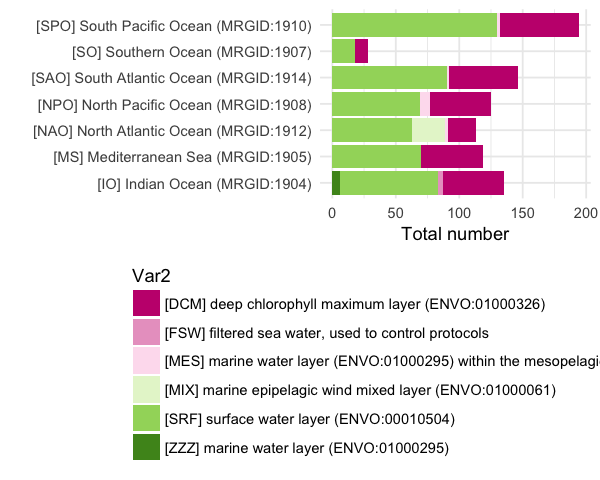

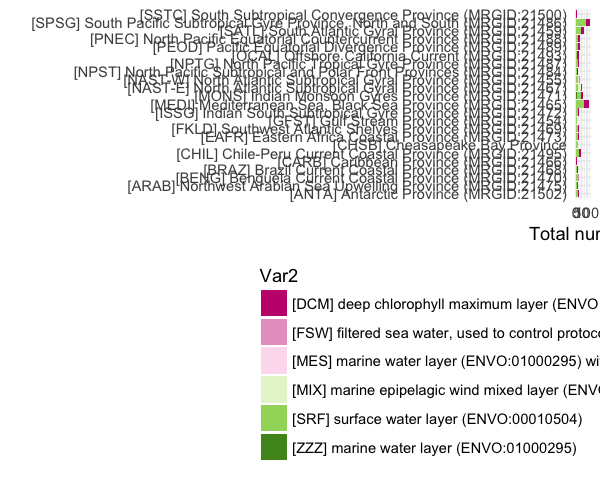

In [17]:
# How many depths per ocean region?
plot_variables(metag_subset_sizefrac, metag_subset_sizefrac$metag.OS.region, metag_subset_sizefrac$metag.Env.feature)
# How many depths per province?
plot_variables(metag_subset_sizefrac, metag_subset_sizefrac$metag.BG.province, metag_subset_sizefrac$metag.Env.feature)

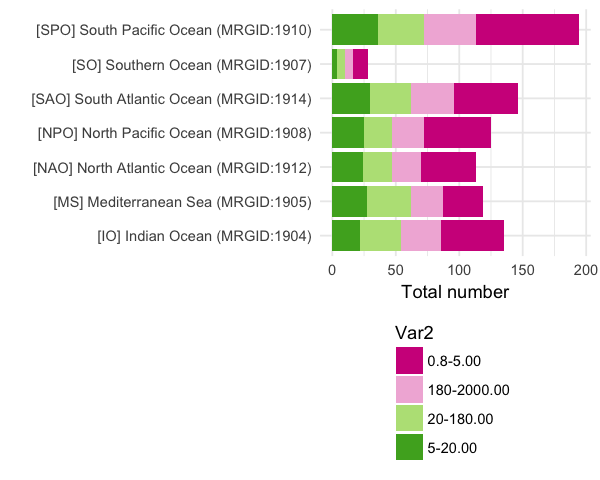

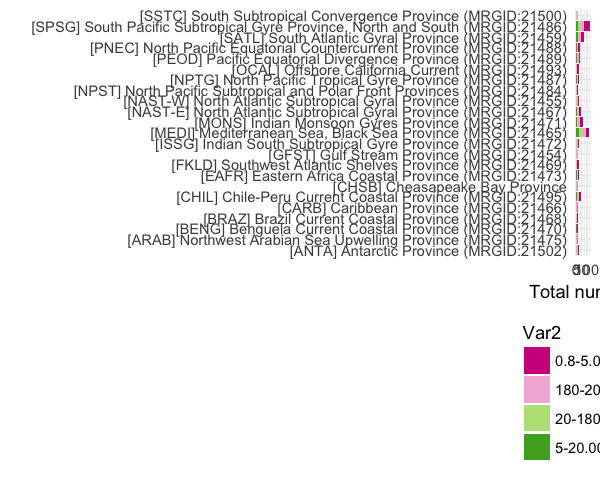

In [18]:
# For each ocean region & province, how many size fractions are there?
plot_variables(metag_subset_sizefrac, metag_subset_sizefrac$metag.OS.region, metag_subset_sizefrac$Size_fraction)
plot_variables(metag_subset_sizefrac, metag_subset_sizefrac$metag.BG.province, metag_subset_sizefrac$Size_fraction)

In [19]:
head(metag_subset_sizefrac[1:3,])
#write.table(metag_subset_sizefrac, file="samples_wlatlong.txt", row.names=FALSE, quote=FALSE, sep="\t")

metag.study_accession,metag.run_accession,metag.Station,metag.size_frac,metag.Env.feature,metag.Sample.material,metag.Depth..nominal,metag.OS.region,metag.BG.province,metag.Latitude,metag.Longitude,Size_fraction
PRJEB6609,ERR1007415,TARA_078,0.8->0.80,[SRF] surface water layer (ENVO:00010504),TARA_078_SRF_0.8->,5,[SAO] South Atlantic Ocean (MRGID:1914),[SATL] South Atlantic Gyral Province (MRGID:21459),-30.1367,-43.2899,0.8-5.00
PRJEB6609,ERR1007416,TARA_076,0.8->0.80,[SRF] surface water layer (ENVO:00010504),TARA_076_SRF_0.8->,5,[SAO] South Atlantic Ocean (MRGID:1914),[SATL] South Atlantic Gyral Province (MRGID:21459),-20.9354,-35.1803,0.8-5.00
PRJEB6609,ERR1007417,TARA_078,0.8->0.80,[DCM] deep chlorophyll maximum layer (ENVO:01000326),TARA_078_DCM_0.8->,120,[SAO] South Atlantic Ocean (MRGID:1914),[SATL] South Atlantic Gyral Province (MRGID:21459),-30.1484,-43.2705,0.8-5.00


In [20]:
# Generate new text file to group files for assembly
# Grouping by ocean region and province, feature/depth, and size fraction
groupby_region_feat_sizefrac<- metag_subset_sizefrac %>%
    group_by(metag.OS.region, metag.BG.province, metag.Env.feature, Size_fraction) %>%
    summarize(ERR_count=paste(length(unique(metag.run_accession))),
              ERR_list=paste(unique(metag.run_accession),collapse=", "))%>%
    mutate(assembly_grp=paste(sub(".*\\[(.*)\\].*", "\\1", metag.OS.region, perl=TRUE), 
                              sub(".*\\[(.*)\\].*", "\\1", metag.BG.province, perl=TRUE),
                              sub(".*\\[(.*)\\].*", "\\1", metag.Env.feature, perl=TRUE),
                              Size_fraction, sep="-"))%>%
    as.data.frame
# Need to include one other line above to group samples so that ERR counts are parsed again.
dim(groupby_region_feat_sizefrac)[1] # Total assemblies
range(as.numeric(groupby_region_feat_sizefrac$ERR_count)) #max min of ERR sample input
# head(groupby_region_feat_sizefrac)

[1] 184

[1]  1 34

In [21]:
# write.table(groupby_region_feat_sizefrac, file="grouped_samples.txt", row.names=FALSE, quote=FALSE, sep="\t")
## Decide on which ocean regions should be split or kept together
unique(metag_subset_sizefrac$metag.OS.region)
unique(metag_subset_sizefrac$metag.BG.province)

[1] [SAO] South Atlantic Ocean (MRGID:1914)
[2] [MS] Mediterranean Sea (MRGID:1905)    
[3] [IO] Indian Ocean (MRGID:1904)         
[4] [SPO] South Pacific Ocean (MRGID:1910) 
[5] [NPO] North Pacific Ocean (MRGID:1908) 
[6] [SO] Southern Ocean (MRGID:1907)       
[7] [NAO] North Atlantic Ocean (MRGID:1912)
7 Levels: [IO] Indian Ocean (MRGID:1904) ...

[1] [SATL] South Atlantic Gyral Province (MRGID:21459)                           
 [2] [MEDI] Mediterranean Sea, Black Sea Province (MRGID:21465)                   
 [3] [MONS] Indian Monsoon Gyres Province (MRGID:21471)                           
 [4] [PEOD] Pacific Equatorial Divergence Province (MRGID:21489)                  
 [5] [OCAL] Offshore California Current (MRGID:21493)                             
 [6] [ANTA] Antarctic Province (MRGID:21502)                                      
 [7] [ISSG] Indian South Subtropical Gyre Province (MRGID:21472)                  
 [8] [SPSG] South Pacific Subtropical Gyre Province, North and South (MRGID:21486)
 [9] [PNEC] North Pacific Equatorial Countercurrent Province (MRGID:21488)        
[10] [EAFR] Eastern Africa Coastal Province (MRGID:21473)                         
[11] [NPTG] North Pacific Tropical Gyre Province (MRGID:21487)                    
[12] [NPST] North Pacific Subtropical and Polar Front Provinces (MRGID:21484)     
[13] [FKLD] Southwest Atlantic Shelves Province (MRGID:21469)                     
[14] [BENG] Benguela Current Coastal Province (MRGID:21470)                       
[15] [CHSB] Cheasapeake Bay Province                                              
[16] [NAST-W] North Atlantic Subtropical Gyral Province (MRGID:21455)             
[17] [NAST-E] North Atlantic Subtropical Gyral Province (MRGID:21467)             
[18] [CHIL] Chile-Peru Current Coastal Province (MRGID:21495)                     
[19] [CARB] Caribbean Province (MRGID:21466)                                      
[20] [ARAB] Northwest Arabian Sea Upwelling Province (MRGID:21475)                
[21] [BRAZ] Brazil Current Coastal Province (MRGID:21468)                         
[22] [GFST] Gulf Stream Province (MRGID:21454)                                    
[23] [SSTC] South Subtropical Convergence Province (MRGID:21500)                  
23 Levels: [ANTA] Antarctic Province (MRGID:21502) ...

In [22]:
# Curation of metaG data for assembly purposes
## Defaults by major ocean region.
## To split up ocean region by province, set 'sub_ocean' equal to character list of oceans
# To split up Inian ocean and N. Atlantic Ocean use: 'sub_ocean<-c("IO", "NAO")'
#
#
set_groups<-function(df, sub_ocean){
    df$Depth_sizefrac<-paste(sub(".*\\[(.*)\\].*", "\\1", df$metag.Env.feature, perl=TRUE), df$Size_fraction, sep="-") # Define depth and size fraction
    df$OS_abbr<-paste(sub(".*\\[(.*)\\].*", "\\1", df$metag.OS.region, perl=TRUE)) # set abbr for Ocean region
    df$BG_abbr<-paste(sub(".*\\[(.*)\\].*", "\\1", df$metag.BG.province, perl=TRUE)) # set abbr for province
    df$Sub_region<-paste(df$OS_abbr, "all", sep="-") # Default assembly group by ocean region
    df$Sub_region<-with(df, ifelse(OS_abbr %in% sub_ocean, (paste(df$OS_abbr, df$BG_abbr, sep="-")), Sub_region))
    df2<-df %>% group_by(Sub_region, Depth_sizefrac)%>%
    summarize(ERR_count=paste(length(unique(metag.run_accession))),
              ERR_list=paste(unique(metag.run_accession),collapse=", "))%>%
    as.data.frame
    df2$Assembly_group<-paste(df2$Sub_region, df2$Depth_sizefrac, sep="-")
    return(df2)    
}
#
groupby_assembly<-set_groups(metag_subset_sizefrac, c("IO", "NAO", "SPO", "SAO"))
head(groupby_assembly[1:3,])

Sub_region,Depth_sizefrac,ERR_count,ERR_list,Assembly_group
IO-ARAB,DCM-0.8-5.00,2,"ERR1719240, ERR1719465",IO-ARAB-DCM-0.8-5.00
IO-ARAB,DCM-180-2000.00,2,"ERR1711955, ERR1712243",IO-ARAB-DCM-180-2000.00
IO-ARAB,DCM-20-180.00,2,"ERR1719414, ERR1719511",IO-ARAB-DCM-20-180.00


[1]  1 34

[1] 153

[1] "IO-ARAB"    "IO-EAFR"    "IO-ISSG"    "IO-MONS"    "MS-all"    
 [6] "NAO-CARB"   "NAO-CHSB"   "NAO-GFST"   "NAO-NAST-E" "NAO-NAST-W"
[11] "NPO-all"    "SAO-BENG"   "SAO-BRAZ"   "SAO-FKLD"   "SAO-SATL"  
[16] "SAO-SSTC"   "SO-all"     "SPO-CHIL"   "SPO-PEOD"   "SPO-SPSG"

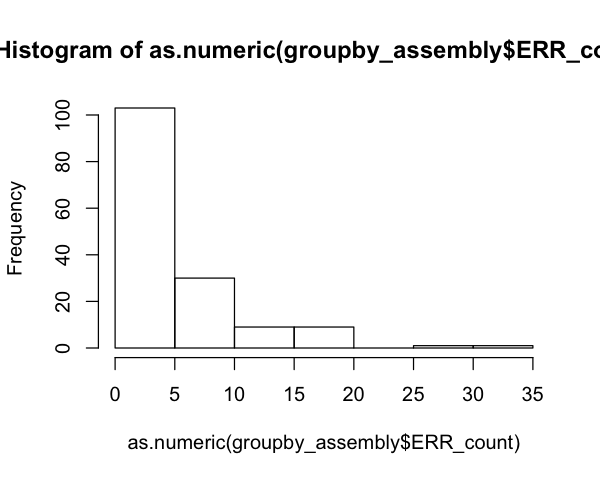

In [23]:
# Get assembly stats:
# range of samples to go into each assembly:
range(as.numeric(groupby_assembly$ERR_count))
# Total number of assemblies:
length(unique(groupby_assembly$Assembly_group))
# List of regional 'divisions' chosen for assembly:
unique(groupby_assembly$Sub_region)
hist(as.numeric(groupby_assembly$ERR_count))

In [24]:
# hist((as.numeric(groupby_region_feat_sizefrac$station_num)))
write.table(groupby_assembly, file="Samplelist_forassembly.txt", , row.names=FALSE, quote=FALSE, sep="\t")